# Modern Physics - Chapter 5
# BVP Examples 
### Dr Daugherity




In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.integrate import solve_ivp

# Example 5-1


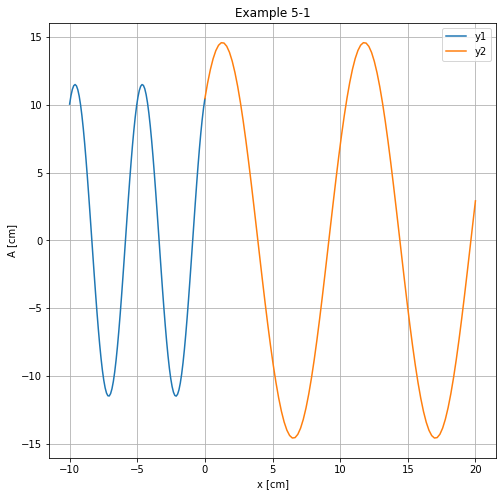

In [0]:
pi = np.pi  # use built-in pi

# WAVE 1
x1_min = -10
x1_max = 0
x1 = np.linspace(x1_min,x1_max,num=100) 
A1 = 11.5       # amplitude
WL1 = 4.97   # wavelength
PHI1 =  -65.3*pi/180 # phase 
y1 = A1*np.sin(2*pi*x1/WL1 - PHI1)   # calculate wave

# WAVE 2
x2_min = 0
x2_max = 20
x2 = np.linspace(x2_min,x2_max,num=100) 
A2 = 14.6      # amplitude
WL2 = 10.5    # wavelength
PHI2 =  -45.8*pi/180 # phase
y2 = A2*np.sin(2*pi*x2/WL2 - PHI2)   # calculate wave

# Make a lovely plot
plt.figure(figsize=(8,8))
plt.plot(x1,y1,label='y1')
plt.plot(x2,y2, label='y2')
plt.xlabel('x [cm]')
plt.ylabel('A [cm]')
plt.title('Example 5-1')
plt.legend()
plt.grid()
plt.show()

# Example 2 - Ball dropping in water



T = 2.020
c1 = -60.609
c2 = 81.224


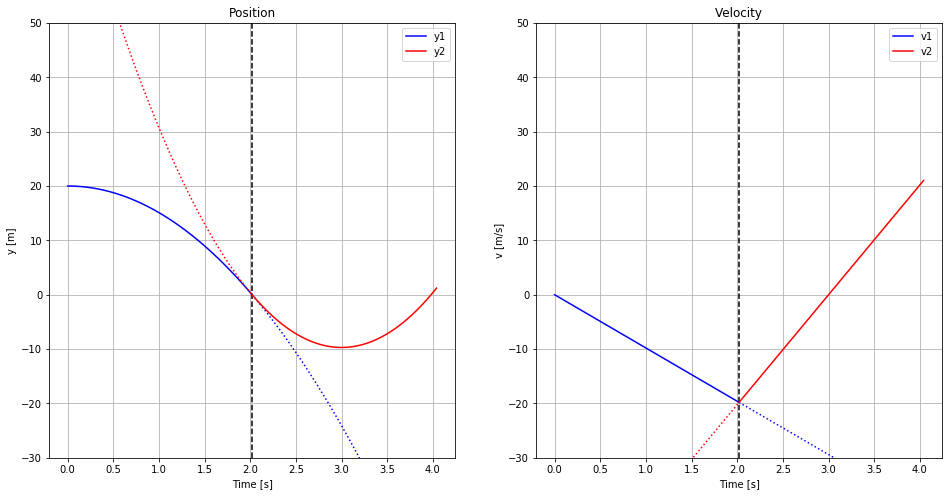

In [0]:
H = 20
B = 30
m = 1
g = 9.8

T = (2*H/g)**0.5
c1 = -B/m*T
c2 = H + B*H/m/g

print(f'T = {T:0.3f}')
print(f"c1 = {c1:0.3f}")
print(f"c2 = {c2:0.3f}")

def y1(t):
  return H - 0.5*g*t**2
def v1(t):
  return  -g*t
def y2(t):
  return c2 + c1*t + 0.5*(B/m-g)*t**2
def v2(t):
  return c1 + (B/m-g)*t

t1 = np.linspace(0,T,num=50)
t2 = np.linspace(T,2*T,num=50)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.axvline(T, c='k',ls='--')
plt.plot(t1,y1(t1),'b-',label='y1')
plt.plot(t2,y1(t2),'b:')
plt.plot(t1,y2(t1),'r:')
plt.plot(t2,y2(t2),'r-',label='y2')
plt.grid()
plt.title('Position')
plt.xlabel('Time [s]')
plt.ylabel('y [m]')
plt.ylim([-30,50])
plt.legend()

plt.subplot(1,2,2)
plt.axvline(T, c='k',ls='--')
plt.plot(t1,v1(t1),'b-',label='v1')
plt.plot(t2,v1(t2),'b:')
plt.plot(t1,v2(t1),'r:')
plt.plot(t2,v2(t2),'r-',label='v2')
plt.grid()
plt.title('Velocity')
plt.xlabel('Time [s]')
plt.ylabel('v [m/s]')
plt.ylim([-30,50])
plt.legend()

plt.show()

In [0]:
# Use Root Finding to find times y2=0
sol = optimize.root_scalar(y2, bracket=[1, 3])
print(sol.root)

sol = optimize.root_scalar(y2, bracket=[3, 5])
print(sol.root)

2.020305089104421
3.980601116156237


In [0]:
# Find Max Depth
sol = optimize.root_scalar(v2, bracket=[2, 4])
T2 = sol.root
print(f"The max depth is {y2(T2):0.3f} at time T2={T2:0.3f}")

The max depth is -9.703 at time T2=3.000


# Totally Numerical Solution
Suppose we didn't (or couldn't) solve the equations.  Can we do it all with python?


In [0]:
a1 = -g
a2 = B/m - g

# Using only these accelerations, can we find numerical values for y1 and y2

def region1(t, y):
  return [y[1],a1]

def region2(t, y):
  return [y[1],a2]

def height(t,y):   # Need this function to set an event to find where y=0
  return y[0]

# Region 1 -- solve for y1 and v1
y0 = [H,0] # initial height and velocity
t_span = [0, 3]
sol1 = solve_ivp(region1, t_span, y0,events=height)
#print(sol1)
y1_sol = sol1.y[0]
v1_sol = sol1.y[1]
t1_sol = sol1.t
T_sol = sol1.t_events[0][0] # time when y=0

# Region 2 -- solve for y2 and v2
y02 = sol1.y_events[0][0]  # height and velocity when y1=0
t_span2 = [T_sol, 4]
sol2 = solve_ivp(region2, t_span2, y02,events=height)
#print(sol2)
y2_sol = sol2.y[0]
v2_sol = sol2.y[1]
t2_sol = sol2.t
T2_sol = sol2.t_events[0][1] # time when y=0

print("Times when y=0 are")
print(T_sol)
print(T2_sol)

Times when y=0 are
2.0203050891044216
3.980601116156238


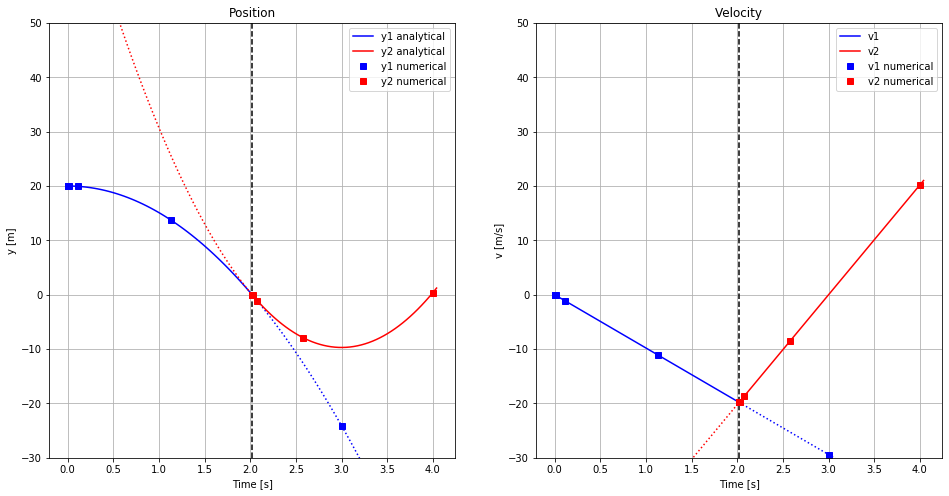

In [0]:
# Plot numerical solutions on top of our analytical ones
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.axvline(T, c='k',ls='--')
plt.plot(t1,y1(t1),'b-',label='y1 analytical')
plt.plot(t2,y1(t2),'b:')
plt.plot(t1,y2(t1),'r:')
plt.plot(t2,y2(t2),'r-',label='y2 analytical')
plt.plot(t1_sol,y1_sol,'bs',label='y1 numerical')
plt.plot(t2_sol,y2_sol,'rs',label='y2 numerical')

plt.grid()
plt.title('Position')
plt.xlabel('Time [s]')
plt.ylabel('y [m]')
plt.ylim([-30,50])
plt.legend()

plt.subplot(1,2,2)
plt.axvline(T, c='k',ls='--')
plt.plot(t1,v1(t1),'b-',label='v1')
plt.plot(t2,v1(t2),'b:')
plt.plot(t1,v2(t1),'r:')
plt.plot(t2,v2(t2),'r-',label='v2')
plt.plot(t1_sol,v1_sol,'bs',label='v1 numerical')
plt.plot(t2_sol,v2_sol,'rs',label='v2 numerical')

plt.grid()
plt.title('Velocity')
plt.xlabel('Time [s]')
plt.ylabel('v [m/s]')
plt.ylim([-30,50])
plt.legend()


plt.show()